<a href="https://colab.research.google.com/github/lefth-nd/ml-expert-potato/blob/main/COMP2712_Assignment01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COMP2712_8715 Assignment01: Classifying Images Using MLP and SVM Algorithms 
This assignment is to explore the concepts covered in the topic so far with respect to training and evaluating classifiers such as the Multi-layer Perceptron (MLP) and Support Vector Machines (SVM).  

This starter Notebook can be used as a starter for this assignment.  It contains examples for reading and manipulating the dataset and training a standard MLP.  You should use this notebook in conjunction with the Assignment Specification that can be found on the topic FLO page: [COMP2712_8715](https://flo.flinders.edu.au/course/view.php?id=71089#section-17)



## Accessing Data from Google Drive
The dataset for this assignment is the CIFAR-10 dataset that can be found here:
https://www.cs.toronto.edu/~kriz/cifar.html 

The CIFAR-10 and CIFAR-100 are well studied, yet challenging image recognition dataset. The CIFAR-10 has up to 10 classes to classify and contains 60,000 32x32 images. You should read the description of the dataset and download the dataset for Python, that is

CIFAR-10 python version: https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz 

Once downloaded you need to then extract and upload the `cifar-10-batches-py` directory your Google Drive so that you can access it from within your Google Colab.

You can mount the Google Drive from the menu on the left or uncomment use the code below mount the drive.  See here for documentation on file access in Colab:

[External data: Local Files, Drive, Sheets, and Cloud Storage](https://colab.research.google.com/notebooks/io.ipynb)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# uncomment the below to mount the google drive
#from google.colab import drive
#drive.mount('/content/drive')

## Functions to work with CIFAR

The functions below help with access to the CIFAR-10 data the you have downloaded.

In [ ]:
import pickle
import numpy as np
import pandas as pd

def load_CIFAR_batch(filename, flatten=True, categorical=True):
    """ load single batch of cifar """
    with open(filename, 'rb') as f:
        datadict = pickle.load(f, encoding='bytes')
        X = datadict[b'data']        
        X = X.reshape(10000, 3, 32, 32).transpose(0, 2, 3, 1).astype("float")
        if (flatten):
          X = X.reshape(10000, 3072)
        X = X.astype('float32')
        X /= 255

        y = datadict[b'labels']
        y = np.array(y)
        if (categorical):
          y = pd.get_dummies(y).values

        return X, y

def load_CIFAR_meta(filename):
  with open(filename,'rb') as f:
    metadict = pickle.load(f, encoding='bytes')

    class_labels = [ val.decode() for val in metadict.get(b'label_names') ]
    return class_labels

def get_image(X, index, nchans=3, size=32):
  xi = X[index,:]
  img = xi.reshape(32, 32, 3)
  return img

## Load the CIFAR data

The CIFAR data has 5 batches of data and 1 test data set. Each batch is labelled
- `data_batch_1`
- `data_batch_2`
- `data_batch_3`
- `data_batch_4`
- `data_batch_5`

and a test set labelled
- `test_batch`

each batch has 10,000 images, so 50,000 training and 10,000 test images.

Below is example of loading the first batch of training data labelled as `data_batch_1`.  You will need to update the path to match where you have stored your cifar-10 data.

In [ ]:
X, y = load_CIFAR_batch('/content/drive/My Drive/COMP2712/data/cifar-10-batches-py/data_batch_1')

The number of instances/examples for all the different classes.  There are 10 different classes.

In [ ]:
[np.sum(np.argmax(y, axis=1) == i) for i in range(0,10)]

[1005, 974, 1032, 1016, 999, 937, 1030, 1001, 1025, 981]

The labels for the classes are stored in the `batches.meta` file

In [ ]:
class_labels = load_CIFAR_meta('/content/drive/MyDrive/COMP2712/data/cifar-10-batches-py/batches.meta')
print(class_labels)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


Let's look at some random cat images, because cats.

In [ ]:
import random
import matplotlib.pyplot as plt

def plot_random(X, y, class_labels, what_target='cat'):

  what_label = class_labels.index(what_target)
  what_labeli = np.where(np.argmax(y,axis=1) == what_label)[0]
  random_what_index = what_labeli[random.choice(range(len(what_labeli)))]

  plt.imshow(get_image(X,random_what_index))
  plt.title('{}, index: {}'.format(what_target,random_what_index))
  plt.axis('off')

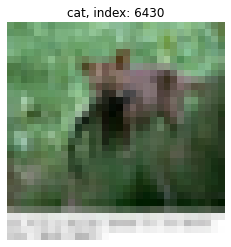

In [ ]:
plot_random(X, y, class_labels, what_target='cat')


## Set up and train MLP

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# split into train and test
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,stratify=y)


hidden_layer_sizes = 100
activation_fcn = 'relu' # {identity, logistic, tanh, relu}, default='relu'
max_iter=200

# model initialization
mlp = MLPClassifier(hidden_layer_sizes=(hidden_layer_sizes), activation=activation_fcn, 
                    max_iter=max_iter, #try change hidden layer, or max_iter
                    solver='adam', verbose=1,   #try verbose=0 to train with out logging
                    random_state=None,
                    tol=0.00001,n_iter_no_change=20) # decreasing tol and increasing no_change will train the network 'harder' and usually longer

mlp.fit(Xtrain, ytrain) 


Iteration 1, loss = 3.40912265
Iteration 2, loss = 2.98938861
Iteration 3, loss = 2.92243669
Iteration 4, loss = 2.88780166
Iteration 5, loss = 2.82222558
Iteration 6, loss = 2.77691084
Iteration 7, loss = 2.76015759
Iteration 8, loss = 2.72223573
Iteration 9, loss = 2.68073712
Iteration 10, loss = 2.65805174
Iteration 11, loss = 2.63879238
Iteration 12, loss = 2.60015923
Iteration 13, loss = 2.60601310
Iteration 14, loss = 2.58066220
Iteration 15, loss = 2.58104181
Iteration 16, loss = 2.55165369
Iteration 17, loss = 2.51741668
Iteration 18, loss = 2.50525718
Iteration 19, loss = 2.48408505
Iteration 20, loss = 2.47580677
Iteration 21, loss = 2.47686140
Iteration 22, loss = 2.45320221
Iteration 23, loss = 2.43439836
Iteration 24, loss = 2.40442063
Iteration 25, loss = 2.41293413
Iteration 26, loss = 2.39066661
Iteration 27, loss = 2.39603738
Iteration 28, loss = 2.39852624
Iteration 29, loss = 2.36776553
Iteration 30, loss = 2.37361233
Iteration 31, loss = 2.35850609
Iteration 32, los

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=100, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=20, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=1e-05, validation_fraction=0.1, verbose=1, warm_start=False)

## Evaluate the performance of the classfier



Need to remember to use `predict_proba` for the multiclass classification and apply a softmax/argmax to the output (i.e. choose the largest probability)

### Test it out on a random image from the training data.  

Image Index:  5975
Probability of class: [ 0  0 13  3 38 16  5  2  0  5]
real class     :  2 => bird
predicted class:  4 => deer


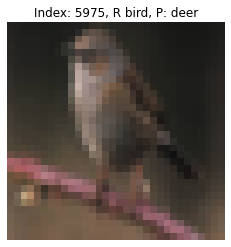

In [ ]:
idx = random.choice(range(Xtrain.shape[0]))
print('Image Index: ',idx)

# make sure you use predict_proba for the multi-class classification
ypreda = mlp.predict_proba(Xtrain)
print('Probability of class: {}'.format((ypreda[idx,:]*100).astype(int)))
ypred = np.argmax(ypreda[idx,:], axis=0)
ytrue = np.argmax(ytrain[idx,:], axis=0)
print('real class     : ',ytrue,'=>',class_labels[ytrue])
print('predicted class: ',ypred,'=>',class_labels[ypred])


plt.imshow(get_image(Xtrain,idx))
plt.title('Index: {}, R {}, P: {}'.format(idx,class_labels[ytrue],class_labels[ypred]))
plt.axis('off');


### Evaluate the performance on the whole training set

In [ ]:
ytrue = np.argmax(ytrain, axis=1)
ypreda = mlp.predict_proba(Xtrain)
ypred = np.argmax(ypreda, axis=1)
report = classification_report(ytrue, ypred)
print(report)

mat = confusion_matrix(ytrue,ypred)
print(mat)


              precision    recall  f1-score   support

           0       0.72      0.85      0.78       754
           1       0.94      0.86      0.90       730
           2       0.63      0.73      0.68       774
           3       0.66      0.73      0.70       762
           4       0.81      0.57      0.67       749
           5       0.82      0.58      0.68       703
           6       0.68      0.88      0.77       772
           7       0.88      0.77      0.82       751
           8       0.86      0.76      0.81       769
           9       0.80      0.92      0.86       736

    accuracy                           0.77      7500
   macro avg       0.78      0.77      0.77      7500
weighted avg       0.78      0.77      0.77      7500

[[641   5  33  10   4   1  15   5  25  15]
 [ 19 626   3   5   5   2   9   4  13  44]
 [ 43   2 565  35  29  15  50  16   8  11]
 [ 13   2  42 560   8  29  73   9   7  19]
 [ 36   6 103  25 426  21  83  25  14  10]
 [ 12   1  61 130  14 409 

### Evaluate on the performance on testing set

In [ ]:
ytrue = np.argmax(ytest, axis=1)
ypreda = mlp.predict_proba(Xtest)
ypred = np.argmax(ypreda, axis=1)
report = classification_report(ytrue, ypred)
print(report)

mat = confusion_matrix(ytrue,ypred)
print(mat)

              precision    recall  f1-score   support

           0       0.46      0.55      0.50       251
           1       0.49      0.38      0.43       244
           2       0.30      0.37      0.33       258
           3       0.24      0.28      0.26       254
           4       0.40      0.27      0.32       250
           5       0.32      0.17      0.22       234
           6       0.34      0.51      0.41       258
           7       0.55      0.46      0.50       250
           8       0.53      0.45      0.48       256
           9       0.42      0.52      0.46       245

    accuracy                           0.40      2500
   macro avg       0.41      0.40      0.39      2500
weighted avg       0.41      0.40      0.39      2500

[[137   9  27   8   4   5  13   7  26  15]
 [ 18  92   9  21   8   4  15   9  19  49]
 [ 22   9  96  26  23  16  30  19  11   6]
 [  9   8  28  72  18  22  49  12  10  26]
 [ 17   7  49  19  68   8  56  13   6   7]
 [  4   7  33  67   8  39 

## Try just classifying two classes

Classfiying all 10 classes can be challenging.  Let's try a simplier task of classfiy just two distinct classes.

In [ ]:
print(class_labels)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [ ]:
one_target = 'frog'
one_label = class_labels.index(one_target)
print('Choose ', class_labels[one_label],'as the first class')
one_labeli = np.where(np.argmax(y,axis=1) == one_label)[0]
print('There are {} instances for the label {}'.format(len(one_labeli),one_target))

Choose  frog as the first class
There are 1030 instances for the label frog


In [ ]:
two_target = 'horse'
two_label = class_labels.index(two_target)
print('Choose ', class_labels[two_label],'as the first class')
two_labeli = np.where(np.argmax(y,axis=1) == two_label)[0]
print('There are {} instances for the label {}'.format(len(two_labeli),two_target))

Choose  horse as the first class
There are 1001 instances for the label horse


In [ ]:
alli = np.hstack((one_labeli,two_labeli))
Xsubset = X[alli,:]

# construct a new y with just the one and two label
ysubset = y[alli,:]
yclass = np.argmax(ysubset,axis=1)
yclass[yclass == one_label] = 1
yclass[yclass == two_label] = 2
print(yclass)
ysubset = pd.get_dummies(yclass).values
print(ysubset)


[1 1 1 ... 2 2 2]
[[1 0]
 [1 0]
 [1 0]
 ...
 [0 1]
 [0 1]
 [0 1]]


### Train

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# split into train and test
Xtrain, Xtest, ytrain, ytest = train_test_split(Xsubset, ysubset,stratify=ysubset)


hidden_layer_sizes = 100
activation_fcn = 'relu' # {identity, logistic, tanh, relu}, default='relu'
max_iter=200

# model initialization
mlp = MLPClassifier(hidden_layer_sizes=(hidden_layer_sizes), activation=activation_fcn, 
                    max_iter=max_iter, #try change hidden layer, or max_iter
                    solver='adam', verbose=1,   #try verbose=0 to train with out logging
                    random_state=None,
                    tol=0.00001,n_iter_no_change=20) # decreasing tol and increasing no_change will train the network 'harder' and usually longer

mlp.fit(Xtrain, ytrain) 



Iteration 1, loss = 1.65555815
Iteration 2, loss = 1.21017618
Iteration 3, loss = 1.07462821
Iteration 4, loss = 1.00470575
Iteration 5, loss = 0.96421779
Iteration 6, loss = 0.89920687
Iteration 7, loss = 0.85409230
Iteration 8, loss = 0.83058493
Iteration 9, loss = 0.79271284
Iteration 10, loss = 0.76675287
Iteration 11, loss = 0.74971061
Iteration 12, loss = 0.72437875
Iteration 13, loss = 0.72562605
Iteration 14, loss = 0.72380068
Iteration 15, loss = 0.68174116
Iteration 16, loss = 0.70297869
Iteration 17, loss = 0.69444955
Iteration 18, loss = 0.69538693
Iteration 19, loss = 0.68285892
Iteration 20, loss = 0.68696362
Iteration 21, loss = 0.70892410
Iteration 22, loss = 0.64820796
Iteration 23, loss = 0.60191009
Iteration 24, loss = 0.59648608
Iteration 25, loss = 0.59020164
Iteration 26, loss = 0.60127480
Iteration 27, loss = 0.56597460
Iteration 28, loss = 0.55565753
Iteration 29, loss = 0.56100811
Iteration 30, loss = 0.53529119
Iteration 31, loss = 0.53745594
Iteration 32, los

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=100, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=20, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=1e-05, validation_fraction=0.1, verbose=1, warm_start=False)

### Evaluate

In [ ]:
print('### Training ###')
ytrue = np.argmax(ytrain, axis=1)
ypred = mlp.predict(Xtrain)
ypred = np.argmax(ypred, axis=1)
report = classification_report(ytrue, ypred)
print(report)

mat = confusion_matrix(ytrue,ypred)
print(mat)
print()
print('### Testing ###')
ytrue = np.argmax(ytest, axis=1)
ypred = mlp.predict(Xtest)
ypred = np.argmax(ypred, axis=1)
report = classification_report(ytrue, ypred)
print(report)
mat = confusion_matrix(ytrue,ypred)
print(mat)

### Training ###
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       772
           1       1.00      1.00      1.00       751

    accuracy                           1.00      1523
   macro avg       1.00      1.00      1.00      1523
weighted avg       1.00      1.00      1.00      1523

[[770   2]
 [  0 751]]

### Testing ###
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       258
           1       0.82      0.82      0.82       250

    accuracy                           0.82       508
   macro avg       0.82      0.82      0.82       508
weighted avg       0.82      0.82      0.82       508

[[214  44]
 [ 45 205]]
